# USED CARS

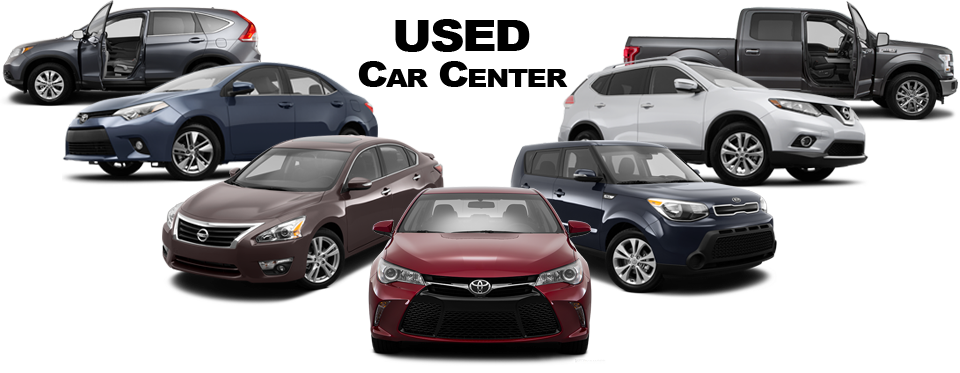

#### *ABOUT THE DATASET*

Dataset Description:
This dataset contains scraped data from Cars24, a popular online marketplace for buying and selling used cars. It provides detailed information on various pre-owned car listings, including:

- Model Name : The name and variant of the car.
- Manufacturing Year: The year the car was manufactured.
- Price: The listed selling price of the car in dollars($). 
- KM Driven (mileage): The total number of kilometers the car has been driven.
- Engine Capacity: The engine size in cubic centimeters (cc), indicating the power output.
- Fuel Type:The type of fuel the car uses (Petrol, Diesel, CNG, Electric, Hybrid).
- Transmission Type: The type of transmission system (Manual/Automatic).
- Ownership History: The number of previous owners (First Owner, Second Owner, etc.).
- Availability of Spare Key: Indicates whether the car comes with an additional spare key (Yes/No).
- Imperfections: Number of Imperfections found while inspecting.
- Repainted Parts: Number of repainted parts.

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
import warnings
warnings.filterwarnings('ignore')

In [6]:
# loading dataset
uc=pd.read_csv("cars24data.csv")

In [7]:
# viewing dataset
uc

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1440,2021 Maruti Ertiga VXI SHVS,862000,2021,1462,No,Manual,19901,1,Petrol,1,0
1441,2015 Maruti Ciaz ZXI,507000,2015,1373,No,Manual,50022,1,Petrol,5,2
1442,2019 Maruti Baleno DELTA PETROL 1.2,554000,2019,1197,Yes,Manual,58679,1,Petrol,24,4
1443,2017 Maruti Ciaz S 1.4 MT PETROL,557000,2017,1373,Yes,Manual,73948,2,Petrol,4,5


##### The used cars dataset has 1445 rows with 11 columns

In [9]:
# finding information about the dataset
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [10]:
#finding unique categories in a column
uc['Ownership'].unique()

array([2, 1, 3], dtype=int64)

In [11]:
uc['Fuel type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

# Data Cleaning

In [13]:
#calling out columns in the dataset
uc.columns

Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type',
       'Imperfections', 'Repainted Parts'],
      dtype='object')

In [14]:
#Renaming columns
uc.rename({"Model Name":"Model_Name"},axis=1, inplace=True)
uc.rename({"Engine capacity":"Engine_capacity"},axis=1, inplace=True)
uc.rename({"Spare key":"Spare_key"},axis=1, inplace=True)
uc.rename({"KM driven":"KM_driven"},axis=1, inplace=True)
uc.rename({"Fuel type":"Fuel_type"},axis=1, inplace=True)
uc.rename({"Repainted Parts":"Repainted_Parts"},axis=1, inplace=True)

In [15]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model_Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine_capacity     1445 non-null   int64 
 4   Spare_key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM_driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel_type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted_Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [16]:
# Converting data types
uc["Spare_key"]= uc["Spare_key"].astype("category")
uc["Transmission"]= uc["Transmission"].astype("category")
uc["Fuel_type"]= uc["Fuel_type"].astype("category")
uc['Manufacturing_year'] = pd.to_datetime(uc['Manufacturing_year'], format='%Y').dt.to_period('Y')


In [17]:
uc.dtypes

Model_Name                   object
Price                         int64
Manufacturing_year    period[Y-DEC]
Engine_capacity               int64
Spare_key                  category
Transmission               category
KM_driven                     int64
Ownership                     int64
Fuel_type                  category
Imperfections                 int64
Repainted_Parts               int64
dtype: object

In [18]:
uc

,Model_Name,Price,Manufacturing_year,Engine_capacity,Spare_key,Transmission,KM_driven,Ownership,Fuel_type,Imperfections,Repainted_Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1440,2021 Maruti Ertiga VXI SHVS,862000,2021,1462,No,Manual,19901,1,Petrol,1,0
1441,2015 Maruti Ciaz ZXI,507000,2015,1373,No,Manual,50022,1,Petrol,5,2
1442,2019 Maruti Baleno DELTA PETROL 1.2,554000,2019,1197,Yes,Manual,58679,1,Petrol,24,4
1443,2017 Maruti Ciaz S 1.4 MT PETROL,557000,2017,1373,Yes,Manual,73948,2,Petrol,4,5


In [19]:
uc.duplicated().sum()

0

##### There are no duplicates

In [21]:
# Saving cleaned data
uc.to_csv("cars24data_cleaned.csv", index=False)

# EXPLORATORY DATA ANALYSIS

In [23]:
#sumary statistics
uc.describe()

,Price,Engine_capacity,KM_driven,Ownership,Imperfections,Repainted_Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,1462.000000,124716.000000,3.000000,43.000000,27.000000


### VISUALS

#### *Overview of the dataset*


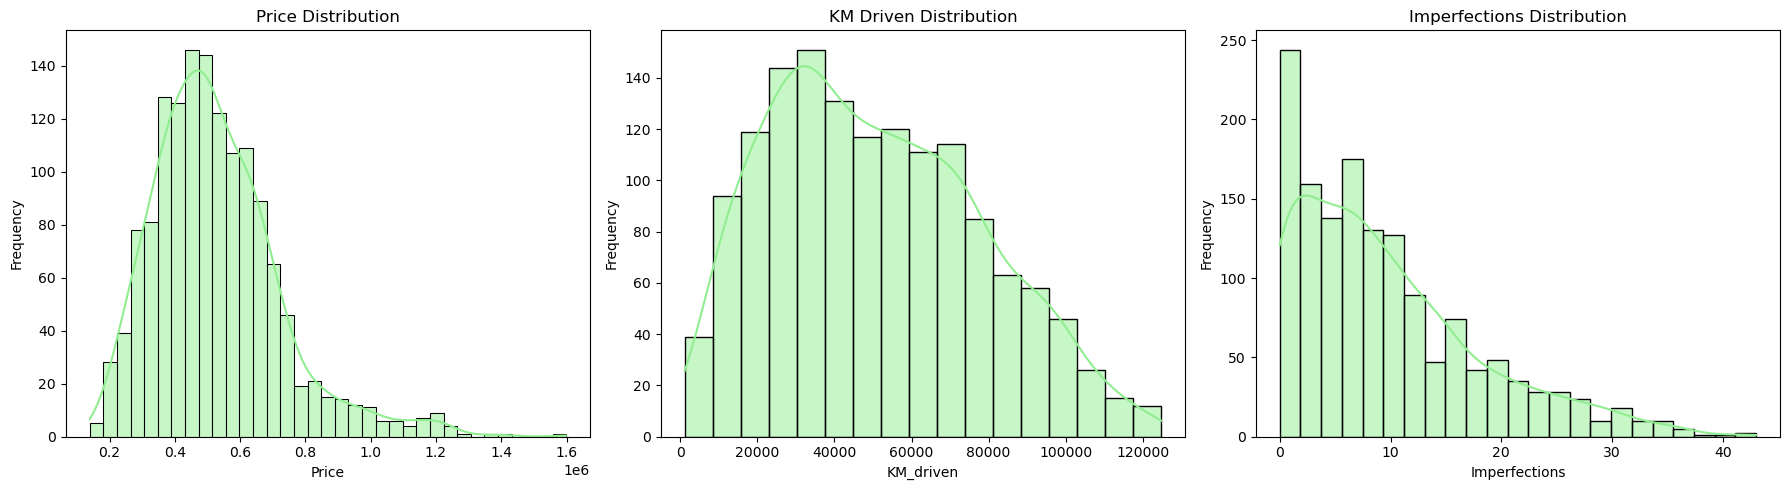

In [26]:
#DISTRIBUTION OF NUMERICAL VARIABLES 
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Price Distribution
sns.histplot(uc['Price'], kde=True, color='lightgreen', edgecolor='black', ax=axs[0])
axs[0].set_title("Price Distribution")
axs[0].set_xlabel("Price")
axs[0].set_ylabel("Frequency")

# KM Driven Distribution
sns.histplot(uc['KM_driven'], kde=True, color='lightgreen', edgecolor='black', ax=axs[1])
axs[1].set_title("KM Driven Distribution")
axs[1].set_xlabel("KM_driven")
axs[1].set_ylabel("Frequency")

# Imperfections Distribution
sns.histplot(uc['Imperfections'], kde=True, color='lightgreen', edgecolor='black', ax=axs[2])
axs[2].set_title("Imperfections Distribution")
axs[2].set_xlabel("Imperfections")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Price Distribution
The positive skew in the price distribution suggests that while most cars are priced on the lower end, a small number of high-priced vehicles act as outliers, pulling the distribution's tail to the right.
#### KM Driven Distribution
 Most used cars have mileage between 20,000 and 60,000 km, with the highest concentration around 30,000–40,000 km.The distribution is right-skewed, indicating a few high-mileage cars above 100,000 km.This suggests that lightly used cars dominate the market, and high-mileage cars are less common. The data indicates a healthy supply of mid-range mileage cars and potential buyer preference for less-driven vehicles.
#### Imperfections Distribution
Most used cars in the dataset have very few imperfections, with a large concentration between 0 to 10 imperfections. The distribution is right-skewed, indicating that cars with higher imperfections are relatively rare. This suggests that the majority of cars are in good physical condition, which could positively influence their market value and buyer preference.


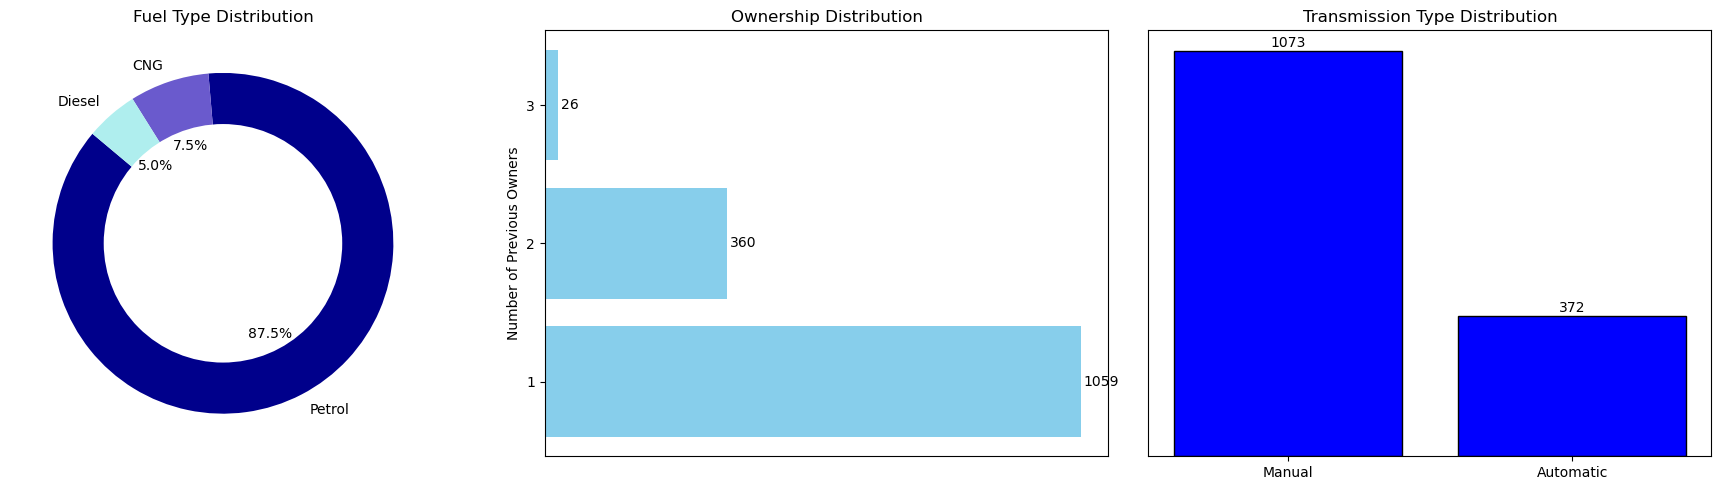

In [28]:
# DISTRIBUTION OF CATEGORICAL VARIABLES
# Get counts
fuel_counts = uc['Fuel_type'].value_counts()
trans_counts = uc['Transmission'].value_counts()
ownership_counts = uc['Ownership'].value_counts().sort_index()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Donut Chart for Fuel Type ---
# Define custom colors
custom_colors = ['darkblue', 'slateblue', 'paleturquoise', ]   

# Donut chart with new colors
wedges, texts, autotexts = axs[0].pie(
    fuel_counts,
    labels=fuel_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors,   
    wedgeprops=dict(width=0.4)
)


centre_circle = plt.Circle((0,0), 0.70, fc='white')
axs[0].add_artist(centre_circle)
axs[0].set_title("Fuel Type Distribution")

# --- 2. Horizontal Bar for Ownership ---
axs[1].barh(ownership_counts.index.astype(str), ownership_counts.values, color='skyblue')
for index, value in enumerate(ownership_counts.values):
    axs[1].text(value + 5, index, str(value), va='center')
axs[1].set_title('Ownership Distribution')
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of Previous Owners')
axs[1].set_xticks([])

# --- 3. Bar Chart for Transmission Type ---
bars = axs[2].bar(trans_counts.index, trans_counts.values, color='blue', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)
axs[2].set_title('Transmission Type Distribution')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_yticks([])

# Layout adjustments
plt.tight_layout()
plt.show()


#### Fuel type distribution

The donut chart shows that petrol-powered cars dominate the market, accounting for 87.5% of the used cars in the dataset. In contrast, CNG and Diesel vehicles represent only 7.5% and 5.0%, respectively. This heavy skew toward petrol may reflect consumer preference, availability, or lower initial costs associated with petrol vehicles. For stakeholders, this indicates that petrol cars are the primary segment to target in marketing or inventory planning.
#### Ownership Distribution
The bar chart indicates that a majority of used cars (over 70%) have only had one previous owner (1,059 out of 1,445 total). Cars with two previous owners make up about 25%, while those with three previous owners are relatively rare, at just 2%.This suggests that the used car market is largely composed of vehicles with lower ownership history, which may be perceived as more reliable and better maintained. For buyers, this could signal greater trust in vehicle condition, while for sellers or platforms, it emphasizes the value of highlighting single-owner vehicles in listings to attract more interest.
#### Transmission Type Distribution
The chart reveals that manual transmission cars significantly dominate the used car market, accounting for nearly 75% of the vehicles (1,073 out of 1,445). In contrast, automatic transmission cars make up only about 25%.
This suggests that manual cars are either more commonly available or more frequently resold, which could be due to several factors:  
Cost efficiency: Manual cars are typically less expensive to buy and maintain.  
Driver preference or skill: In some markets, more drivers are trained or prefer manual vehicles.  
Market availability: The original supply of manual vehicles may have been higher.
For sellers and marketers, this implies a larger inventory and target audience for manual cars, while automatic cars may attract niche buyers seeking convenience, especially in urban settings.

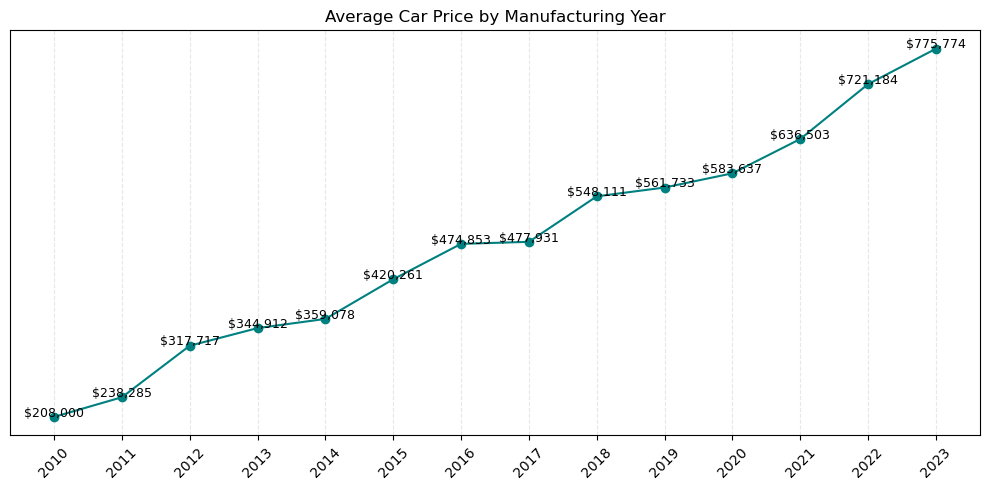

In [30]:
# AVERAGE CAR PRICE BY MANUFACTURING YEAR
# Group by Manufacturing Year and calculate average price
avg_price_by_year = uc.groupby('Manufacturing_year')['Price'].mean().sort_index()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(avg_price_by_year.index.astype(str), avg_price_by_year.values, marker='o', color='teal')

# Add data labels on each point
for x, y in zip(avg_price_by_year.index.astype(str), avg_price_by_year.values):
    plt.text(x, y + 500, f'${int(y):,}', ha='center', fontsize=9)   
plt.title('Average Car Price by Manufacturing Year')
plt.xlabel('')
plt.ylabel('') 
plt.yticks([])   
plt.xticks(rotation=45)
plt.grid(False, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


The analysis shows a clear positive correlation between the manufacturing year and average car price, meaning newer cars are generally more expensive. For example, cars from 2010 average around  208,000 while those from 2023 average $775,774.

This trend highlights that:
- Vehicle depreciation plays a major role in pricing, as older cars lose value over time.
- Technological advancements, enhanced features, and modern designs in newer models contribute to higher prices.
- For buyers, older cars may be more budget-friendly, while newer cars reflect premium pricing due to recent production and updated specs.
- For sellers or dealerships, inventory with newer models may yield higher profit margins, but might also cater to a smaller audience with higher purchasing power.


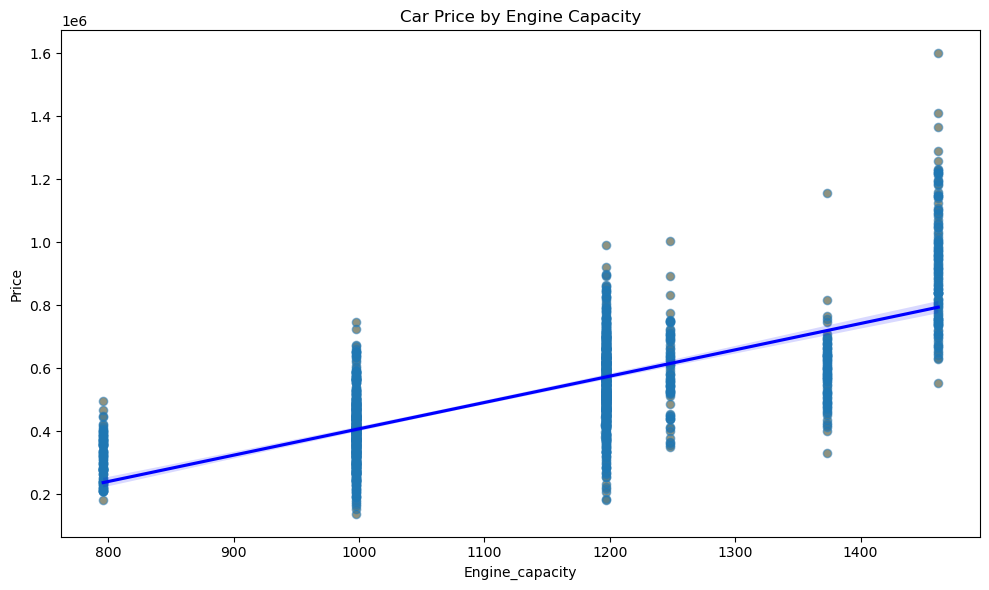

In [32]:
# Car Price By Engine Capacity
plt.figure(figsize=(10,6))
sns.scatterplot(x='Engine_capacity', y='Price', data=uc, color='darkorange', alpha=0.7)
plt.title('Car Price by Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price')
plt.tight_layout()
sns.regplot(x='Engine_capacity', y='Price', data=uc, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.savefig('price_vs_engine_capacity.png')
plt.show()


This chart reveals a positive relationship between engine capacity and price. Cars with larger engines tend to be more expensive on average. However, price variation within the same engine size suggests that additional factors also impact pricing. As engine capacity increases, car prices generally increase too. Engine sizes appear to be clustered at standard levels (e.g., 800cc, 1000cc, 1200cc, 1400cc), which is common in vehicle models. A few cars with larger engine capacities have extremely high prices, indicating potential outliers or premium vehicles. There's a wide spread in prices within the same engine capacity, meaning other factors (like brand name, manufacturing year, features) also influence price.



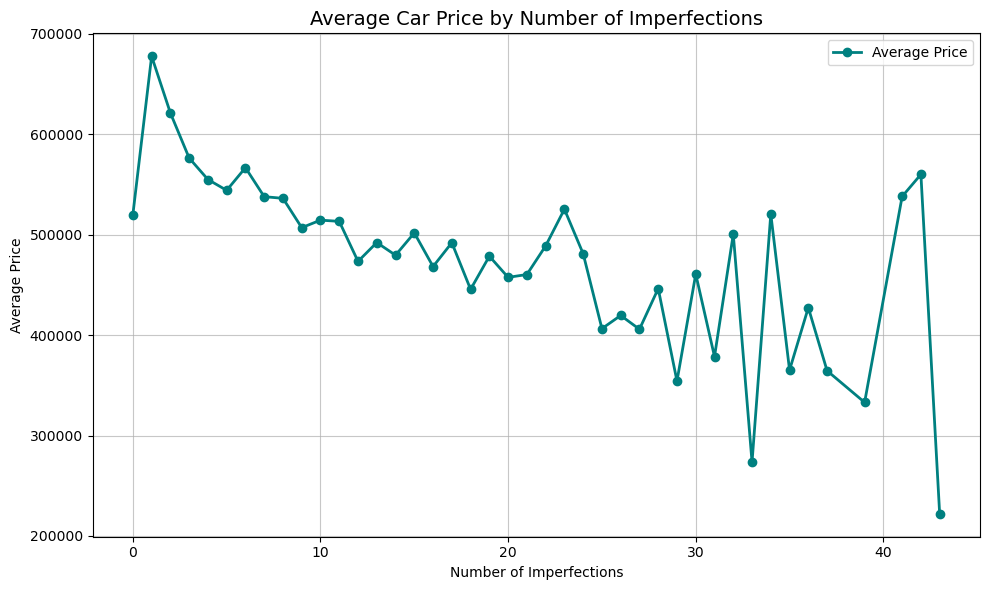

In [34]:
# AVERAGE CAR PRICE BY NUMBER PF CAR IMPERFECTIONS
# Group by 'Imperfections' and calculate average price
avg_price = uc.groupby('Imperfections')['Price'].mean().reset_index()

# Sort by Imperfections for proper line flow
avg_price.sort_values('Imperfections', inplace=True)

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_price['Imperfections'], avg_price['Price'], marker='o', color='teal', linewidth=2, label='Average Price')

plt.title('Average Car Price by Number of Imperfections', fontsize=14)
plt.xlabel('Number of Imperfections')
plt.ylabel('Average Price')
plt.grid(False, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Based on the chart showing average used car prices versus number of imperfections:

There's a clear negative correlation between imperfections and price, with cars having zero imperfections commanding premium prices around $520,000. The steepest price drop occurs in the 0-5 imperfection range, after which the decline becomes more erratic. Despite the general downward trend, several anomalous price increases appear (particularly around 40 imperfections), suggesting other factors beyond imperfection count influence pricing. The final dramatic price drop at 42+ imperfections indicates a threshold where cars become significantly devalued. This reveals that while imperfections generally decrease value, the relationship isn't strictly linear, and the market likely considers both quantity and quality of imperfections.

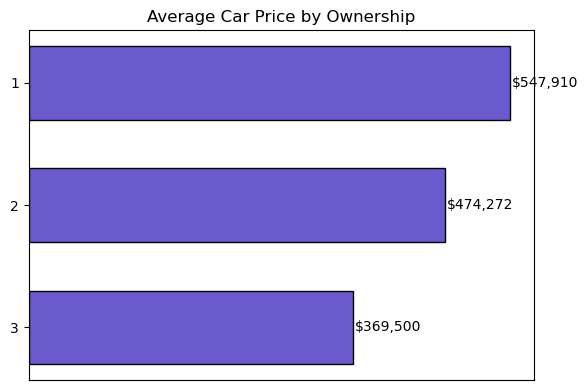

In [35]:
# AVERAGE CAR PRICE BY THE NUMBER OF TIMES THE CAR HAS BEEN OWNED
# Group by Ownership and calculate average Price
ownership_avg_price = uc.groupby('Ownership')['Price'].mean().sort_values(ascending=False)

# Create funnel chart using horizontal bars
plt.figure(figsize=(6, 4))
bars = plt.barh(
    ownership_avg_price.index.astype(str),
    ownership_avg_price.values,
    color='slateblue',
    edgecolor='black',
    height=0.6
)

 
for index, value in enumerate(ownership_avg_price.values):
    plt.text(value + 2000, index, f"${int(value):,}", va='center', fontsize=10)

 
plt.title('Average Car Price by Ownership')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.gca().invert_yaxis()   
plt.tight_layout()
plt.show()


There is a clear inverse relationship between the number of previous owners and the average price of used cars. Vehicles owned only once have the highest average price of 547,910 dollars, followed by those owned twice at 474,272 dollars, and the lowest average price is seen in cars owned thrice at 369,500 dollars.This chart suggests that cars with fewer previous owners tend to retain higher value, likely due to better perceived condition, reliability, and lower wear and tear. For buyers, this emphasizes the importance of ownership history in pricing decisions. For sellers and dealerships, highlighting single-owner history can be a strong value proposition.

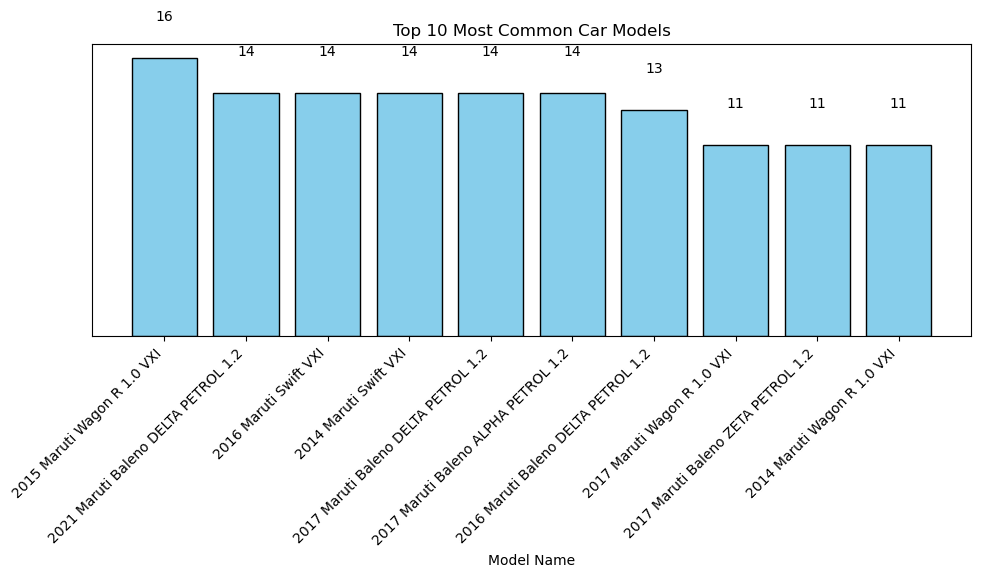

In [37]:
# TOP 10 MOST COMMON CAR MODELS
# Get top 10 models by count
top_models = uc['Model_Name'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
x_positions = range(len(top_models))  # Positions for bars

bars = plt.bar(x_positions, top_models.values, color='skyblue', edgecolor='black')

# Add data labels on top of bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, str(yval), ha='center', va='bottom', fontsize=10)
plt.xticks(x_positions, top_models.index, rotation=45, ha='right')
plt.title('Top 10 Most Common Car Models')
plt.xlabel('Model Name')
plt.ylabel('')
plt.yticks([])
plt.tight_layout()
plt.show()


Baleno appears 5 timesin the top 10, across years and trims (Delta, Alpha, Zeta).
Wagon R appears 3 times, all being the 1.0 VXI variant, a budget-friendly, high-utility car.These indicates high ownership volume, popularity in resale, and sustained demand for these models.
Almost all listed models are  VXI or  Delta, mid-level variants with good value-for-money (not base, not premium).
Consumers often favor these trims for their cost-effectiveness while still getting comfort & essential features.
Model Years Range From 2014 to 2021 shows a resale window of about 3 to 10 years, aligning with common car ownership cycles.E.g., 2015 cars now being ~9–10 years old — ready for resale.2021 models being sold could be due to **upgrade buyers**, **corporate fleet turnover**, or **loan issues**.


### Strategic Takeaways:
If you're a seller, these models suggest you're competing in a  high-supply segment , so  pricing competitively  and ensuring  good condition  is key.
- If you're a  buyer , these are the models where you’ll find  most options  and possibly  better deals  due to availability.
- If you're a  dealer , stocking and rotating these popular trims (esp. Baleno/Wagon R/Swift in VXI or Delta) is a  low-risk inventory strategy.



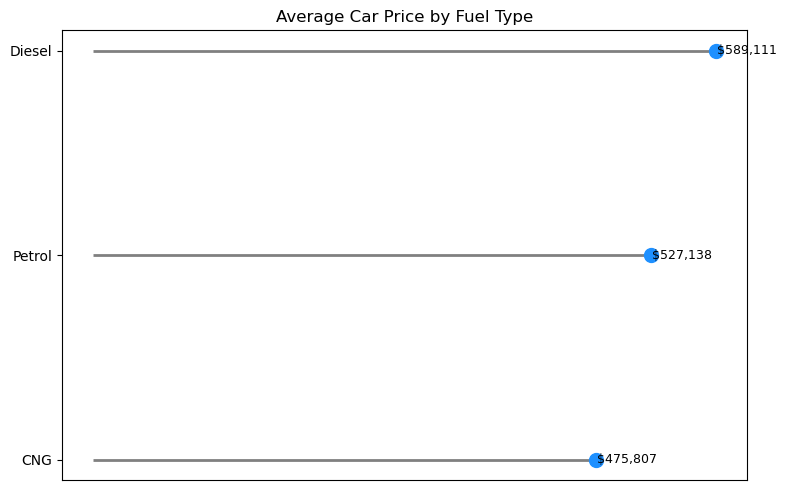

In [39]:
# LOLLIPOP PLOT SHOWING AVERAGE CAR PRICE BY THE FUEL TYPE
# Calculate average price per fuel type
fuel_avg_price = uc.groupby('Fuel_type')['Price'].mean().sort_values()

# Set up the plot
plt.figure(figsize=(8, 5))
plt.hlines(y=fuel_avg_price.index, xmin=0, xmax=fuel_avg_price.values, color='gray', linewidth=2)
plt.plot(fuel_avg_price.values, fuel_avg_price.index, "o", color='dodgerblue', markersize=10)

for idx, value in enumerate(fuel_avg_price.values):
    plt.text(value + 1000, idx, f"${int(value):,}", va='center', fontsize=9)
plt.title('Average Car Price by Fuel Type')
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()



1. #####  **Diesel cars command the highest average price**
   - Diesel engines are typically found in larger or more premium variants.
   - Diesel cars may also offer better mileage, making them popular for long-distance use.
   - They often have higher initial costs, which is reflected in the resale market.

2. ##### **Petrol cars are less expensive compared to diesel cars**
   - Petrol is widely available and often chosen for city driving due to smoother, quieter engines.
   - Moderate pricing reflects both demand and supply in the market.

3. ##### **CNG cars are the most budget-friendly**
   - These are usually retrofitted or factory-fitted small cars aimed at cost-conscious buyers.
   - Their lower price could also reflect limited power, reduced trunk space (due to tanks), or perceived limitations.

4. ##### Market Dynamics:
   - The pricing trend also hints at consumer preference linked to use case:
     - Diesel  for performance and heavy use
     - Petrol  for general versatility
     - CNG  for economy and eco-friendliness


# MACHINE LEARNING 

In [42]:
# Select only numeric columns
numeric_cols = uc.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Correlation of all columns with Price
price_corr = correlation_matrix['Price'].sort_values(ascending=False)

# Display
print("Correlation of each numeric column with Price:\n")
print(price_corr)


Correlation of each numeric column with Price:

Price              1.000000
Engine_capacity    0.718906
Ownership         -0.193696
Repainted_Parts   -0.207350
Imperfections     -0.245968
KM_driven         -0.308925
Name: Price, dtype: float64


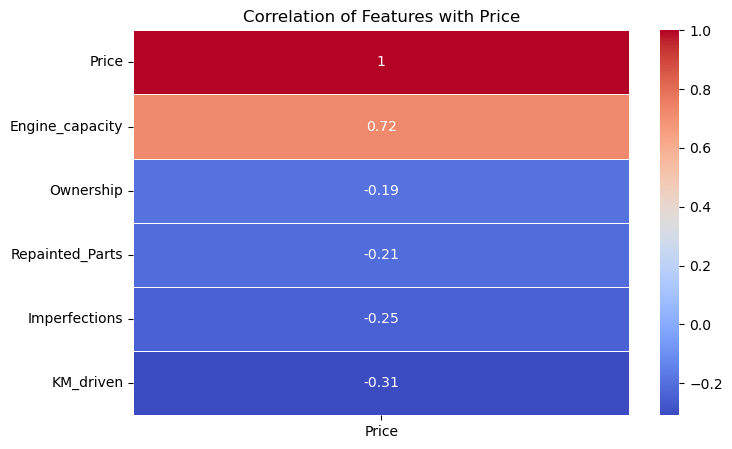

In [43]:
# finding the correlation of other variables with price
plt.figure(figsize=(8, 5))
sns.heatmap(price_corr.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Price')
plt.show()


In [44]:
# Features and Target
X = uc[['Engine_capacity','Ownership', 'Repainted_Parts', 'Imperfections', 'KM_driven', ]]
y = uc['Price']


 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.64
Mean Squared Error: 12044628341.21
Root Mean Squared Error: 109748.02


In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared (Random Forest): {r2:.2f}")


R-squared (Random Forest): 0.67


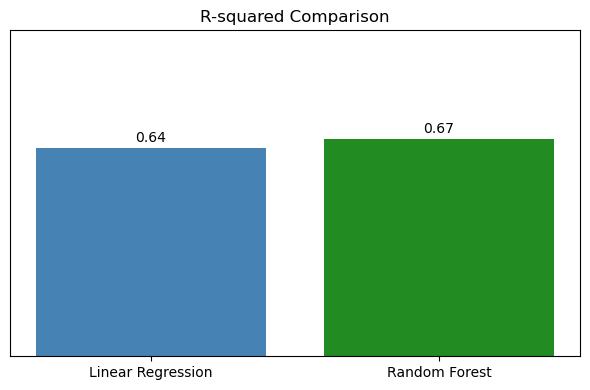

In [46]:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

# Plot R-squared values
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2, rf_r2]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, r2_scores, color=['steelblue', 'forestgreen'])

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title("R-squared Comparison")
plt.ylabel("")
plt.yticks([])
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



 
The Random Forest Regressor is opted for because;
Higher R² (0.67 > 0.64) → better predictive accuracy.
Non-linear capability: Random Forest can capture complex relationships that linear regression cannot.
Robustness: It handles outliers and multicollinearity better.
Feature importance: You can easily extract insights on which features are most influential in predicting car prices.
Even though the R² difference is small, Random Forest gives flexibility, better generalization, and deeper insight into what drives price making it the smarter choice.